
# Periodic Star Modulation Fit

This metric was written by Nina Hernitschek (nina.hernitschek@vanderbilt.edu) to evaluate the feasibility of recovering light-curve modulation in RR Lyrae stars, such as caused by the Blazhko effect.  
While our primary purpose is studying the detection of the Blazhko effect, this metric not solely aims at that purpose, but at evaluating variable star light curves from short time intervals in general. We evaluate our metric at OpSim 1.7 databases baseline_nexp2_v1.7_10yrs.db, rolling_scale0.2_nslice2_v1.7_10yrs.db and pair_times_55_v1.7_10yrs.db.

The metric described here is based on the sims_maf_contrib \texttt{PeriodicStarMetric} metric.
It was modified in a way to reproduce attempts to identify a change in period, phase or amplitude in RR Lyrae stars.    
We have not implemented this modulation in the curve itself, as the modulation can take very different forms. Instead, we investigate how well we can
identify period, phase or amplitude from a variable star's light curve on rather short baselines (15, 20, 30, 50 days). This attempt is also useful for other purposes, i.e. if we want to test whether we can just recover period, phase and amplitude from short baselines at all, without necessarily having in mind to look for light-curve modulations.


In [ ]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import pandas as pd
import mafContrib
#from mafContrib import PeriodicStarMetric 
from mafContrib  import TransientAsciiMetric

from PeriodicStarModulationMetric import PeriodicStarModulationMetric


hhh

In [3]:
# Baseline Survey
runName = 'baseline_nexp2_v1.7_10yrs'

opsdb = db.OpsimDatabase('/sims_maf/fbs_1.7/baseline/baseline_nexp2_v1.7_10yrs.db')

# Rolling cadence

#runName = 'rolling_scale0.2_nslice2_v1.7_10yrs'

#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.7/rolling/rolling_scale0.2_nslice2_v1.7_10yrs.db')

# Pair times cadence

#runName = 'pair_times_55_v1.7_10yrs'

#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.7/pair_times/pair_times_55_v1.7_10yrs.db')




# old 1.5 simulation of Baseline Survey

#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.5/baseline/baseline_v1.5_10yrs.db')


# old 1.5 simulation of Baseline Survey

#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.5/baseline/baseline_v1.5_10yrs.db')


outDir = 'Transients'
resultsDb = db.ResultsDb(outDir=outDir)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  29
number of subruns:  29
number of subruns:  35
number of subruns:  35
number of subruns:  34
number of subruns:  30
number of subruns:  30
number of subruns:  34
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  33
number of subruns:  28
number of subruns:  30
number of subruns:  34
number of subruns:  33
number of subruns:  37
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  30
number of subruns:  29
number of subruns:  31
number of subruns:  34
number of subruns:  34
number of subruns:  34
number of subruns:  36
number of subruns:  35
numb

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.19435  dipole: lon: -93.4952, lat: -18.0315, amp: 0.0905461
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  29
number of subruns:  29
number of subruns:  35
number of subruns:  35
number of subruns:  34
number of subruns:  30
number of subruns:  30
number of subruns:  34
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  33
number of subruns:  28
number of subruns:  30
number of subruns:  34
number of subruns:  33
number of subruns:  37
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  30
number of subruns:  29
number of subruns:  31
number of subruns:  34
number of subruns:  34
number of subruns:  34
number of subruns:  36
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.144683  dipole: lon: -99.3363, lat: -20.4392, amp: 0.0654177
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  29
number of subruns:  29
number of subruns:  35
number of subruns:  35
number of subruns:  34
number of subruns:  30
number of subruns:  30
number of subruns:  34
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  33
number of subruns:  28
number of subruns:  30
number of subruns:  34
number of subruns:  33
number of subruns:  37
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  30
number of subruns:  29
number of subruns:  31
number of subruns:  34
number of subruns:  34
number of subruns:  34
number of subruns:  36
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0832724  dipole: lon: -99.1021, lat: -24.9946, amp: 0.0434183
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  29
number of subruns:  29
number of subruns:  35
number of subruns:  35
number of subruns:  34
number of subruns:  30
number of subruns:  30
number of subruns:  34
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  33
number of subruns:  28
number of subruns:  30
number of subruns:  34
number of subruns:  33
number of subruns:  37
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  30
number of subruns:  29
number of subruns:  31
number of subruns:  34
number of subruns:  34
number of subruns:  34
number of subruns:  36
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0327276  dipole: lon: -99.4089, lat: -28.3502, amp: 0.0206316
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  29
number of subruns:  29
number of subruns:  35
number of subruns:  35
number of subruns:  34
number of subruns:  30
number of subruns:  30
number of subruns:  34
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  33
number of subruns:  28
number of subruns:  30
number of subruns:  34
number of subruns:  33
number of subruns:  37
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  30
number of subruns:  29
number of subruns:  31
number of subruns:  34
number of subruns:  34
number of subruns:  34
number of subruns:  36
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.00773613  dipole: lon: -96.6171, lat: -30.7416, amp: 0.00728034
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  29
number of subruns:  29
number of subruns:  35
number of subruns:  35
number of subruns:  34
number of subruns:  30
number of subruns:  30
number of subruns:  34
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  33
number of subruns:  28
number of subruns:  30
number of subruns:  34
number of subruns:  33
number of subruns:  37
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  30
number of subruns:  29
number of subruns:  31
number of subruns:  34
number of subruns:  34
number of subruns:  34
number of subruns:  36
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.00113852  dipole: lon: -92.5194, lat: -37.294, amp: 0.00152125
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  22
number of subruns:  21
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  22
number of subruns:  22
number of subruns:  25
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  21
number of subruns:  22
number of subruns:  25
number of subruns:  25
number of subruns:  27
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  23
number of subruns:  21
number of subruns:  23
number of subruns:  26
number of subruns:  25
number of subruns:  25
number of subruns:  27
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/plots/spatialPlotters.py:224: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(fignum, figsize=plotDict['figsize'])
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.305918

Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  22
number of subruns:  21
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  22
number of subruns:  22
number of subruns:  25
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  21
number of subruns:  22
number of subruns:  25
number of subruns:  25
number of subruns:  27
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  23
number of subruns:  21
number of subruns:  23
number of subruns:  26
number of subruns:  25
number of subruns:  25
number of subruns:  27
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.238301  dipole: lon: -104.043, lat: -16.325, amp: 0.102227
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  22
number of subruns:  21
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  22
number of subruns:  22
number of subruns:  25
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  21
number of subruns:  22
number of subruns:  25
number of subruns:  25
number of subruns:  27
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  23
number of subruns:  21
number of subruns:  23
number of subruns:  26
number of subruns:  25
number of subruns:  25
number of subruns:  27
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.142338  dipole: lon: -103.087, lat: -18.7967, amp: 0.0738005
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  22
number of subruns:  21
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  22
number of subruns:  22
number of subruns:  25
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  21
number of subruns:  22
number of subruns:  25
number of subruns:  25
number of subruns:  27
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  23
number of subruns:  21
number of subruns:  23
number of subruns:  26
number of subruns:  25
number of subruns:  25
number of subruns:  27
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0576967  dipole: lon: -97.7091, lat: -18.7709, amp: 0.0407931
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  22
number of subruns:  21
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  22
number of subruns:  22
number of subruns:  25
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  21
number of subruns:  22
number of subruns:  25
number of subruns:  25
number of subruns:  27
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  23
number of subruns:  21
number of subruns:  23
number of subruns:  26
number of subruns:  25
number of subruns:  25
number of subruns:  27
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0128668  dipole: lon: -96.5544, lat: -24.9643, amp: 0.0118406
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  22
number of subruns:  21
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  22
number of subruns:  22
number of subruns:  25
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  21
number of subruns:  22
number of subruns:  25
number of subruns:  25
number of subruns:  27
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  23
number of subruns:  21
number of subruns:  23
number of subruns:  26
number of subruns:  25
number of subruns:  25
number of subruns:  27
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.00159194  dipole: lon: -91.5782, lat: -31.1927, amp: 0.00190353
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  14
number of subruns:  14
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  16
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  16
number of subruns:  18
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  18
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.459615  dipole: lon: -102.878, lat: -7.79527, amp: 0.146436
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  14
number of subruns:  14
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  16
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  16
number of subruns:  18
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  18
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.384827  dipole: lon: -106.891, lat: -10.8393, amp: 0.144105
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  14
number of subruns:  14
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  16
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  16
number of subruns:  18
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  18
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.255088  dipole: lon: -105.188, lat: -16.0231, amp: 0.12319
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  14
number of subruns:  14
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  16
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  16
number of subruns:  18
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  18
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.111455  dipole: lon: -101.788, lat: -18.4743, amp: 0.0757324
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  14
number of subruns:  14
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  16
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  16
number of subruns:  18
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  18
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0239603  dipole: lon: -93.8439, lat: -28.3817, amp: 0.0214878
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  14
number of subruns:  14
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  16
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  16
number of subruns:  18
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  18
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.00301163  dipole: lon: -89.5222, lat: -30.1015, amp: 0.0031647
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  8
number of subruns:  8
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.628634  dipole: lon: -86.8421, lat: 9.98274, amp: 0.123697
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  8
number of subruns:  8
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.5655  dipole: lon: -97.3235, lat: 3.27577, amp: 0.131694
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  8
number of subruns:  8
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.42844  dipole: lon: -104.329, lat: -5.90652, amp: 0.130534
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  8
number of subruns:  8
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.214147  dipole: lon: -102.56, lat: -12.2737, amp: 0.100403
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  8
number of subruns:  8
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0535521  dipole: lon: -96.1614, lat: -18.5992, amp: 0.039299
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  8
number of subruns:  8
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.00634047  dipole: lon: -91.936, lat: -29.3424, amp: 0.00539764
  warnings.warn(


Plotting complete.


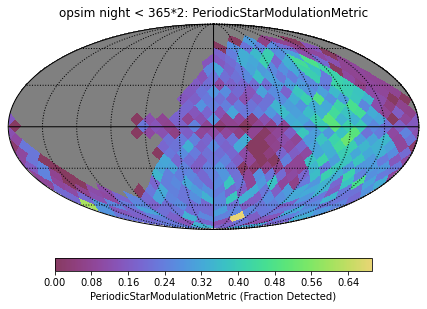

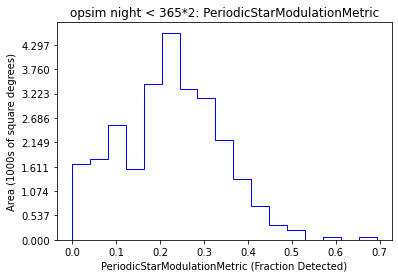

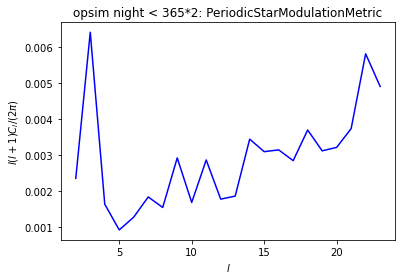

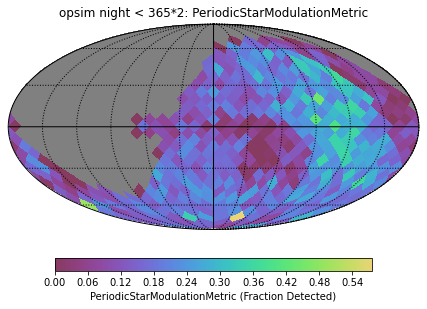

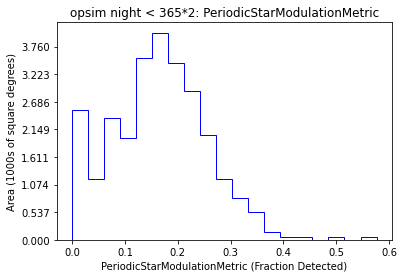

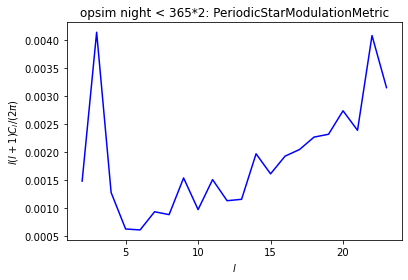

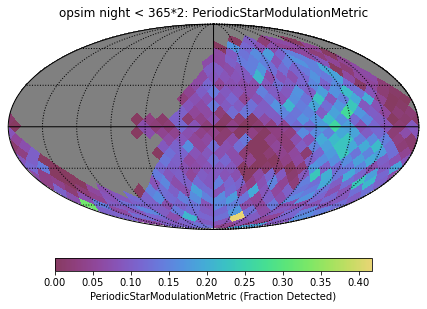

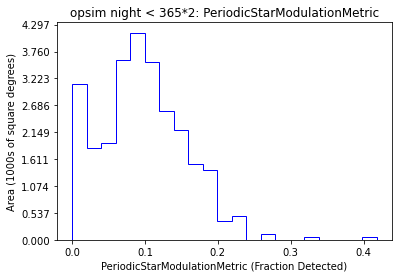

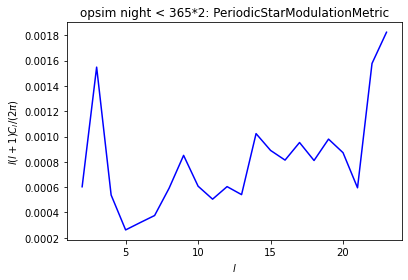

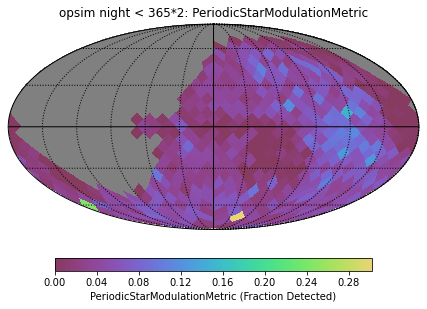

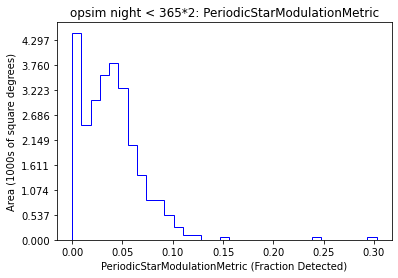

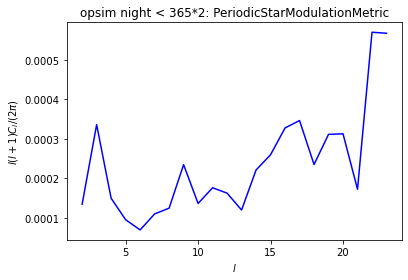

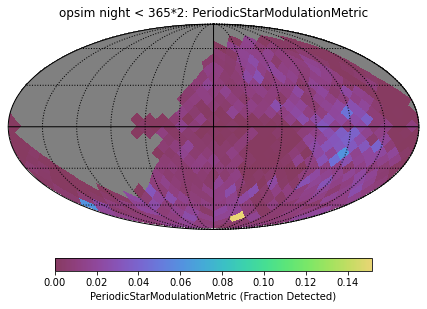

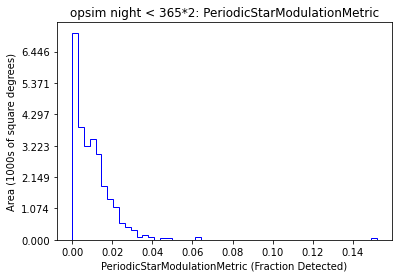

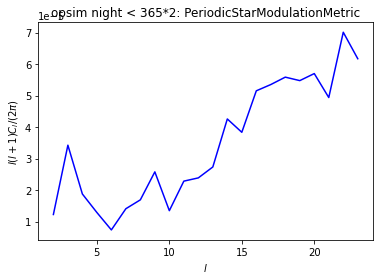

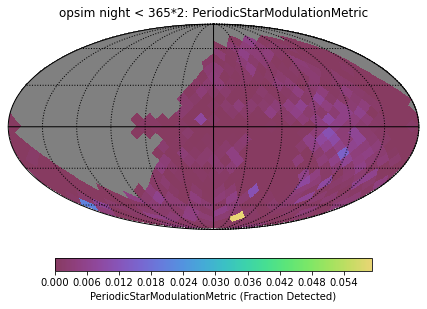

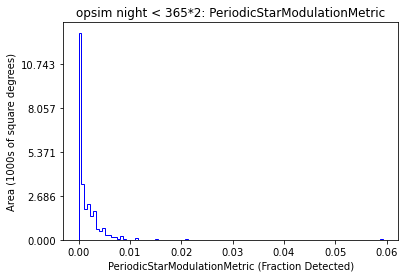

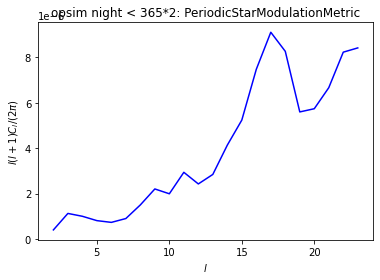

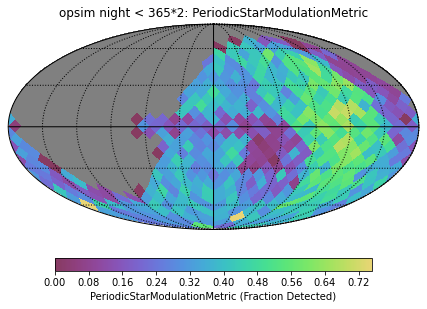

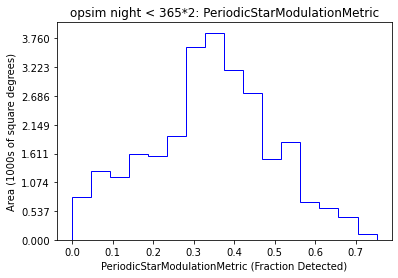

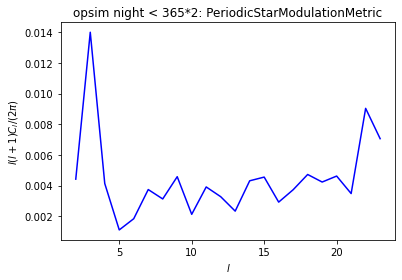

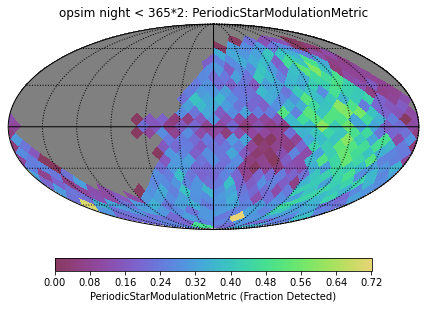

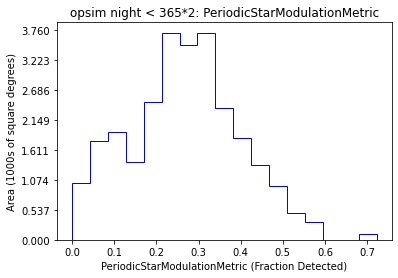

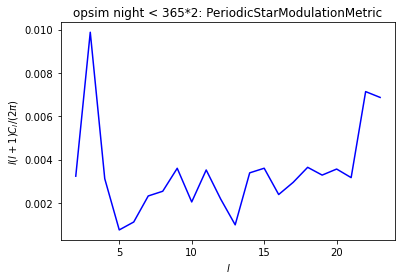

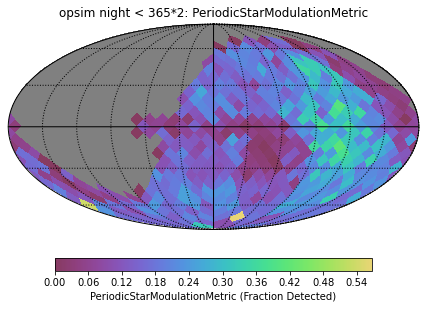

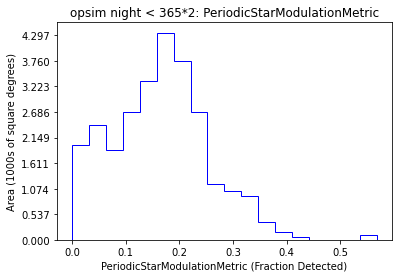

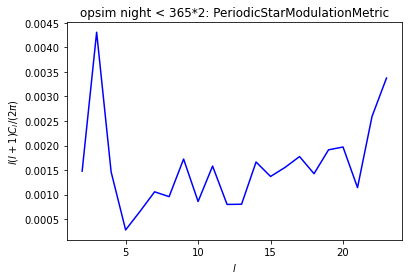

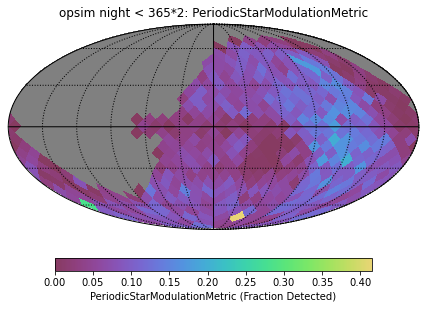

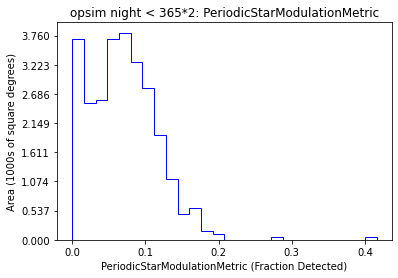

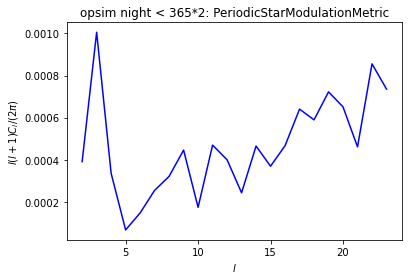

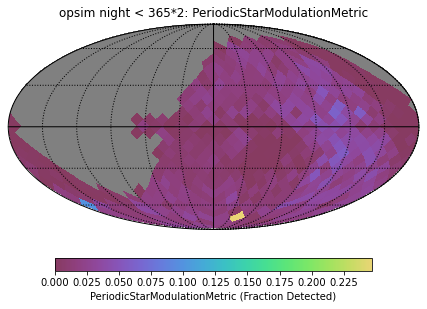

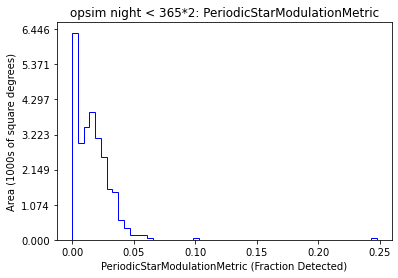

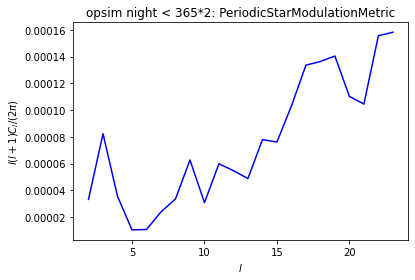

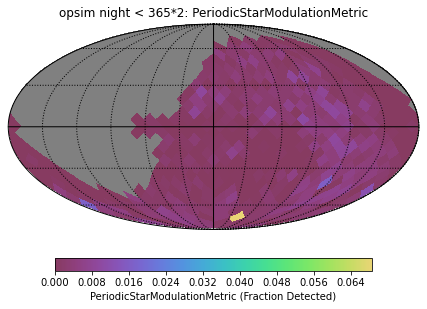

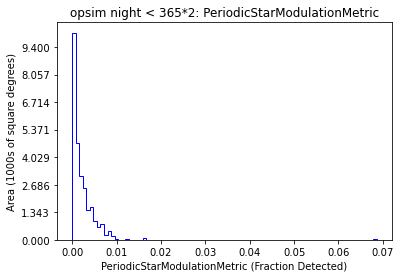

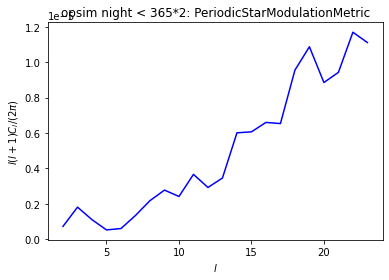

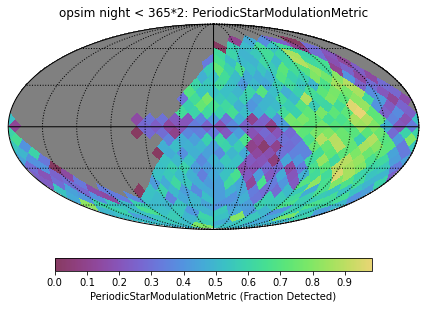

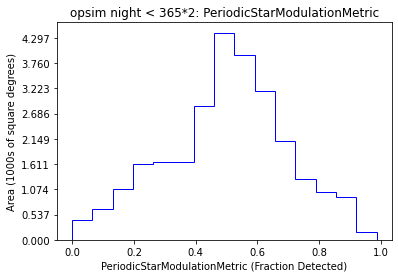

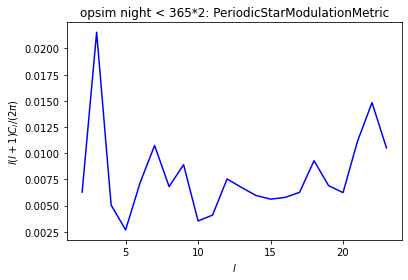

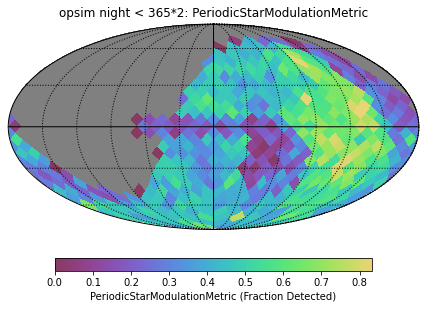

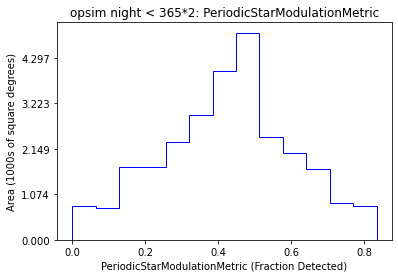

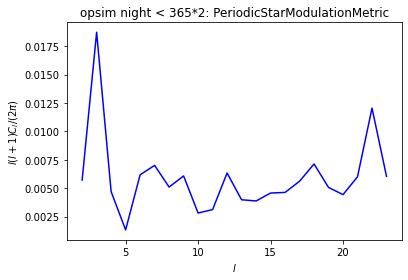

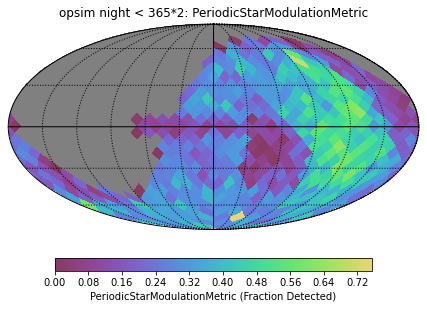

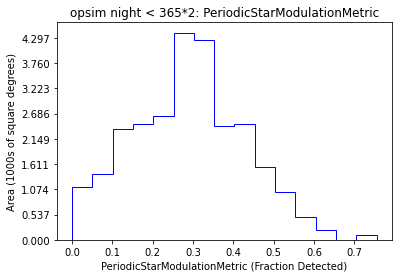

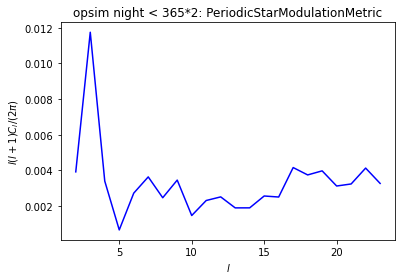

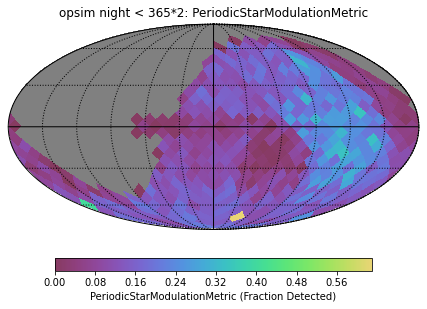

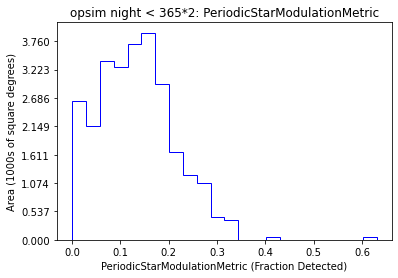

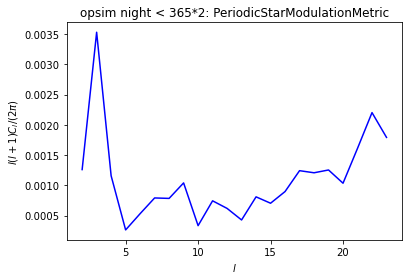

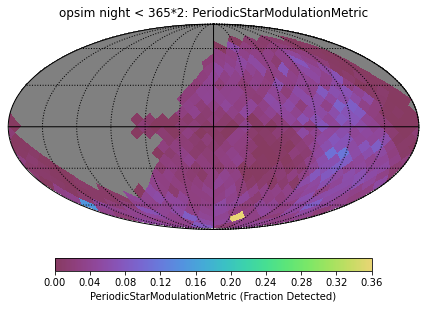

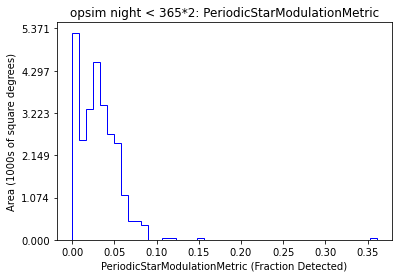

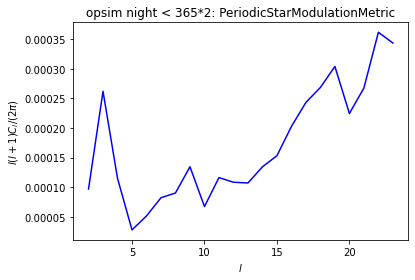

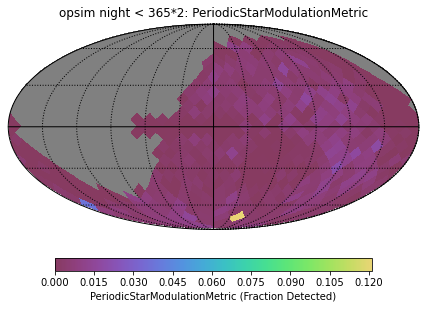

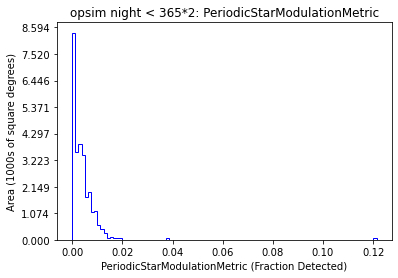

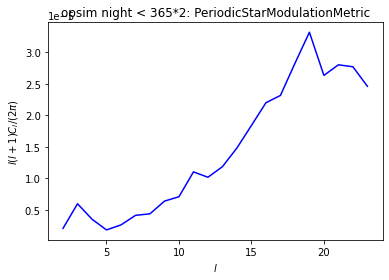

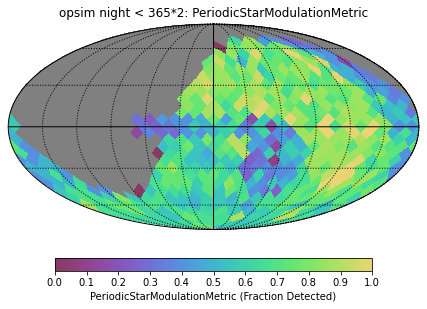

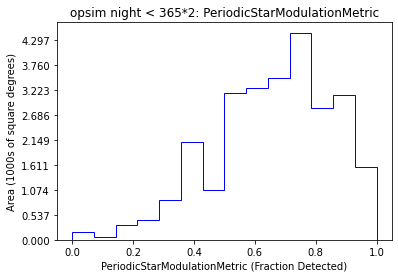

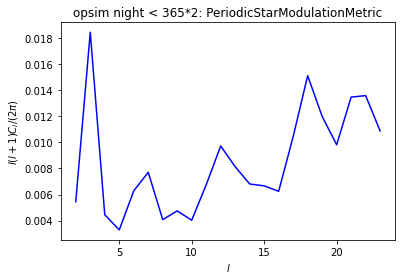

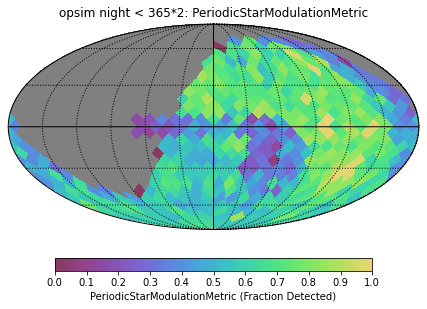

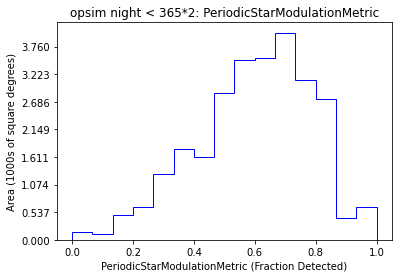

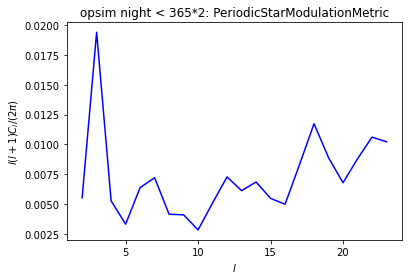

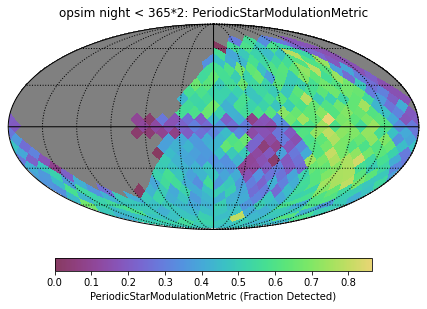

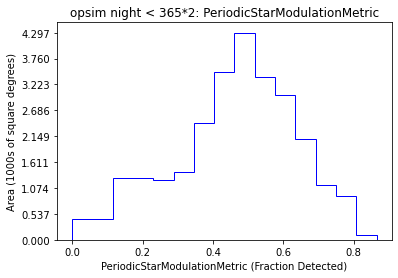

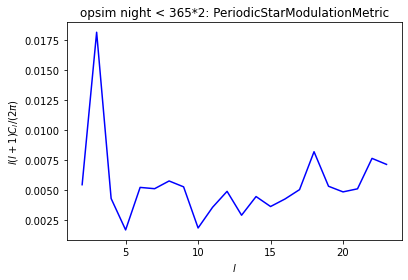

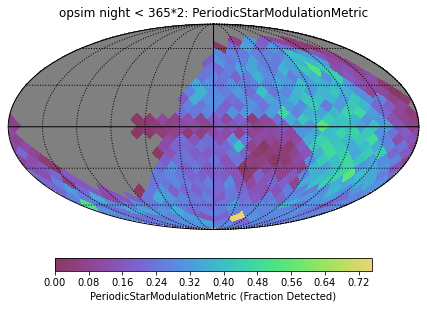

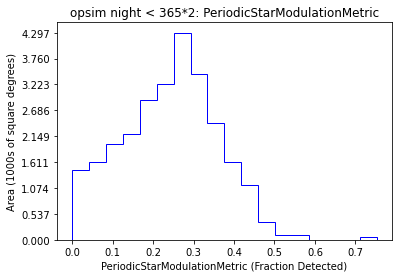

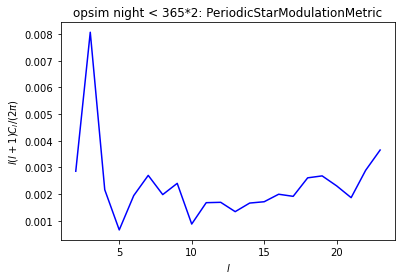

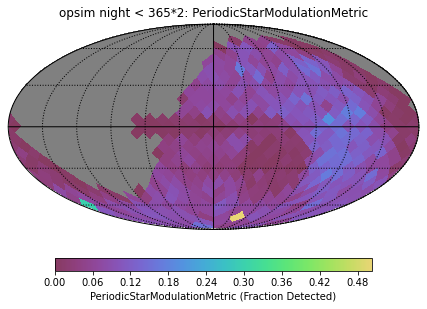

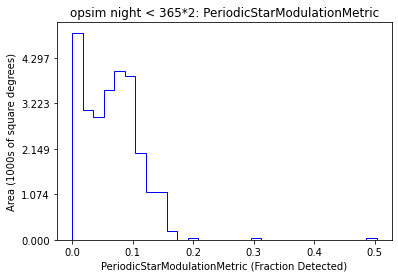

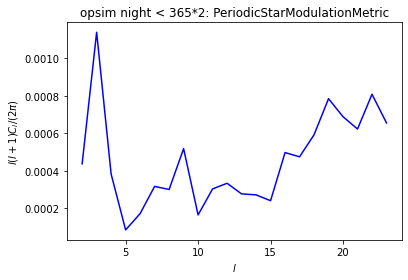

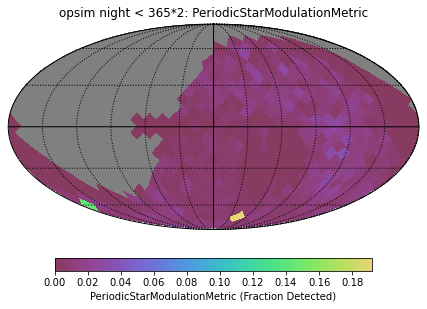

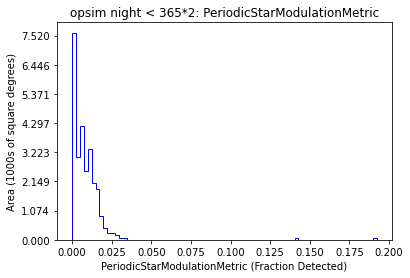

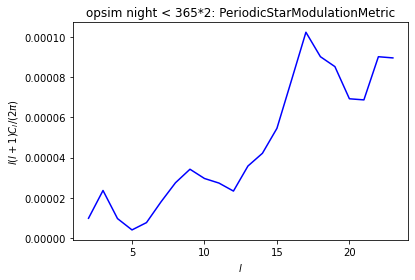

In [4]:
#Typical periods and amplitude for type c RR Lyrae
#RP_RRc = {0.3,0.32,0.35}
#RA_RRc = {0.3,0.3,0.27}
#compute absolute magnitudes in ugrizy of RRc from OGLE observations in Magellanic Clouds 
#(and we assume 18.5 and 0.08 for the distance modulus and reddening of LMC ).
I_rrc_lmc = 18.9
V_rrc_lmc = 19.2
Vi = V_rrc_lmc - (2.742 * 0.08) - 18.5   
Ii = I_rrc_lmc - (1.505 * 0.08) - 18.5

ii_rrc = Ii + 0.386*0.013 + 0.397  # 0.013 = (i-z)_0
gi_rrc = ii_rrc+ 1.481*(Vi-Ii) - 0.536
ri_rrc = (1/0.565) * (Vi-0.435*gi_rrc + 0.016)
ui_rrc = gi_rrc + 0.575
zi_rrc = ii_rrc - 0.013
yi_rrc = zi_rrc

time_intervals = (15,20,30,50) #the interval in days over which we want to evaluate the light curve
distMod = (17.0,18.0,19.0,20.0,21.0,22.0) 

for k in range(0,len(time_intervals)):
    
    time_interval = time_intervals[k]

    for j in range(0,len(distMod)):

        dm = distMod[j]

        metric = PeriodicStarModulationMetric(period=0.3, amplitude=0.3,random_phase=True,
                                      time_interval=time_interval,
                                nMonte=100, periodTol=0.002, ampTol=0.01, means=[ui_rrc+dm,gi_rrc+dm,ri_rrc+dm,ii_rrc+dm,zi_rrc+dm,yi_rrc+dm],
                                magTol=0.01, nBands=3)        
    
        #slicer = slicers.HealpixSlicer(nside=8)
    
        slicer = slicers.HealpixSlicer(nside=8,latCol='galb', lonCol='gall', latLonDeg=False)

        sql = 'night < 365*2'
        
        #alternative SQL:  
        #year_start=0
        #year_finish=2
        #sql = 'night between %d and %d' % (365.25 * year_start, 365.25 * year_finish)

        bundle = metricBundles.MetricBundle(metric,slicer,sql)
        bg =  metricBundles.MetricBundleGroup({0:bundle}, opsdb,
                                          outDir=outDir, resultsDb=resultsDb)    
        bg.runAll()
        
        
        bg.plotAll(closefigs=False, outfileSuffix = 'dm%f.2_timeinterval%idays_repeat_RRc_gal'%(dm,time_interval))
        
        #use this for rolling cadence, pair_times
        #bg.plotAll(closefigs=False, outfileSuffix = 'dm%f.2_timeinterval%idays_repeat_RRc_gal_rolling'%(dm,time_interval))
        #bg.plotAll(closefigs=False, outfileSuffix = 'dm%f.2_timeinterval%idays_repeat_RRc_gal_pairtimes'%(dm,time_interval))


Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  29
number of subruns:  29
number of subruns:  35
number of subruns:  35
number of subruns:  34
number of subruns:  30
number of subruns:  30
number of subruns:  34
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  33
number of subruns:  28
number of subruns:  30
number of subruns:  34
number of subruns:  33
number of subruns:  37
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  30
number of subruns:  29
number of subruns:  31
number of subruns:  34
number of subruns:  34
number of subruns:  34
number of subruns:  36
number of subruns:  35
numb

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.198332  dipole: lon: -93.3504, lat: -18.686, amp: 0.0929349
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  29
number of subruns:  29
number of subruns:  35
number of subruns:  35
number of subruns:  34
number of subruns:  30
number of subruns:  30
number of subruns:  34
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  33
number of subruns:  28
number of subruns:  30
number of subruns:  34
number of subruns:  33
number of subruns:  37
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  30
number of subruns:  29
number of subruns:  31
number of subruns:  34
number of subruns:  34
number of subruns:  34
number of subruns:  36
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.150331  dipole: lon: -97.047, lat: -15.048, amp: 0.0671015
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  29
number of subruns:  29
number of subruns:  35
number of subruns:  35
number of subruns:  34
number of subruns:  30
number of subruns:  30
number of subruns:  34
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  33
number of subruns:  28
number of subruns:  30
number of subruns:  34
number of subruns:  33
number of subruns:  37
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  30
number of subruns:  29
number of subruns:  31
number of subruns:  34
number of subruns:  34
number of subruns:  34
number of subruns:  36
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0814848  dipole: lon: -98.1499, lat: -23.1854, amp: 0.0468898
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  29
number of subruns:  29
number of subruns:  35
number of subruns:  35
number of subruns:  34
number of subruns:  30
number of subruns:  30
number of subruns:  34
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  33
number of subruns:  28
number of subruns:  30
number of subruns:  34
number of subruns:  33
number of subruns:  37
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  30
number of subruns:  29
number of subruns:  31
number of subruns:  34
number of subruns:  34
number of subruns:  34
number of subruns:  36
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0312315  dipole: lon: -99.7162, lat: -29.2617, amp: 0.0231581
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  29
number of subruns:  29
number of subruns:  35
number of subruns:  35
number of subruns:  34
number of subruns:  30
number of subruns:  30
number of subruns:  34
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  33
number of subruns:  28
number of subruns:  30
number of subruns:  34
number of subruns:  33
number of subruns:  37
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  30
number of subruns:  29
number of subruns:  31
number of subruns:  34
number of subruns:  34
number of subruns:  34
number of subruns:  36
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.00677386  dipole: lon: -91.9269, lat: -33.0778, amp: 0.00727582
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  29
number of subruns:  29
number of subruns:  35
number of subruns:  35
number of subruns:  34
number of subruns:  30
number of subruns:  30
number of subruns:  34
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  33
number of subruns:  28
number of subruns:  30
number of subruns:  34
number of subruns:  33
number of subruns:  37
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  35
number of subruns:  30
number of subruns:  29
number of subruns:  31
number of subruns:  34
number of subruns:  34
number of subruns:  34
number of subruns:  36
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.000922556  dipole: lon: -88.2169, lat: -41.02, amp: 0.00152408
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  22
number of subruns:  21
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  22
number of subruns:  22
number of subruns:  25
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  21
number of subruns:  22
number of subruns:  25
number of subruns:  25
number of subruns:  27
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  23
number of subruns:  21
number of subruns:  23
number of subruns:  26
number of subruns:  25
number of subruns:  25
number of subruns:  27
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/plots/spatialPlotters.py:224: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(fignum, figsize=plotDict['figsize'])
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.309736

Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  22
number of subruns:  21
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  22
number of subruns:  22
number of subruns:  25
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  21
number of subruns:  22
number of subruns:  25
number of subruns:  25
number of subruns:  27
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  23
number of subruns:  21
number of subruns:  23
number of subruns:  26
number of subruns:  25
number of subruns:  25
number of subruns:  27
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.244286  dipole: lon: -101.522, lat: -12.8182, amp: 0.103984
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  22
number of subruns:  21
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  22
number of subruns:  22
number of subruns:  25
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  21
number of subruns:  22
number of subruns:  25
number of subruns:  25
number of subruns:  27
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  23
number of subruns:  21
number of subruns:  23
number of subruns:  26
number of subruns:  25
number of subruns:  25
number of subruns:  27
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.141667  dipole: lon: -101.952, lat: -15.9124, amp: 0.0721148
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  22
number of subruns:  21
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  22
number of subruns:  22
number of subruns:  25
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  21
number of subruns:  22
number of subruns:  25
number of subruns:  25
number of subruns:  27
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  23
number of subruns:  21
number of subruns:  23
number of subruns:  26
number of subruns:  25
number of subruns:  25
number of subruns:  27
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0552565  dipole: lon: -100.147, lat: -14.3485, amp: 0.0346793
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  22
number of subruns:  21
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  22
number of subruns:  22
number of subruns:  25
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  21
number of subruns:  22
number of subruns:  25
number of subruns:  25
number of subruns:  27
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  23
number of subruns:  21
number of subruns:  23
number of subruns:  26
number of subruns:  25
number of subruns:  25
number of subruns:  27
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0116868  dipole: lon: -95.0638, lat: -25.454, amp: 0.0107784
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  22
number of subruns:  21
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  22
number of subruns:  22
number of subruns:  25
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  25
number of subruns:  21
number of subruns:  22
number of subruns:  25
number of subruns:  25
number of subruns:  27
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  26
number of subruns:  23
number of subruns:  21
number of subruns:  23
number of subruns:  26
number of subruns:  25
number of subruns:  25
number of subruns:  27
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0015752  dipole: lon: -90.7362, lat: -30.8431, amp: 0.00159728
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  14
number of subruns:  14
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  16
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  16
number of subruns:  18
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  18
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.465159  dipole: lon: -101.974, lat: -7.49644, amp: 0.14617
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  14
number of subruns:  14
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  16
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  16
number of subruns:  18
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  18
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.387561  dipole: lon: -105.554, lat: -11.7016, amp: 0.147493
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  14
number of subruns:  14
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  16
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  16
number of subruns:  18
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  18
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.249262  dipole: lon: -106.149, lat: -17.9246, amp: 0.124378
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  14
number of subruns:  14
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  16
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  16
number of subruns:  18
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  18
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.104286  dipole: lon: -99.9289, lat: -22.0318, amp: 0.073162
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  14
number of subruns:  14
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  16
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  16
number of subruns:  18
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  18
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0219451  dipole: lon: -95.3576, lat: -26.6713, amp: 0.0199516
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  14
number of subruns:  14
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  16
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  16
number of subruns:  18
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  15
number of subruns:  14
number of subruns:  15
number of subruns:  17
number of subruns:  17
number of subruns:  17
number of subruns:  18
number o

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.00267176  dipole: lon: -90.537, lat: -36.0765, amp: 0.0029134
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  8
number of subruns:  8
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.629771  dipole: lon: -85.6818, lat: 6.18988, amp: 0.132077
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  8
number of subruns:  8
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.569717  dipole: lon: -95.9056, lat: 3.61917, amp: 0.126935
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  8
number of subruns:  8
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.417216  dipole: lon: -103.388, lat: -6.6057, amp: 0.13532
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  8
number of subruns:  8
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.201079  dipole: lon: -100.658, lat: -12.7927, amp: 0.102718
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  8
number of subruns:  8
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0478922  dipole: lon: -94.2896, lat: -17.6494, amp: 0.0347688
  warnings.warn(


Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint night < 365*2 for columns ['fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 396785 visits
Running:  [0]
number of subruns:  8
number of subruns:  8
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  9
number of subruns:  8
number of subruns:  9
number of subruns:  10
number of subruns:  10
number of subruns:  10
number of subruns:  11
number of subruns

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.00542337  dipole: lon: -87.9202, lat: -37.1644, amp: 0.00502128
  warnings.warn(


Plotting complete.


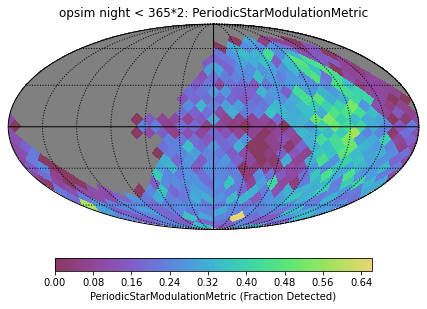

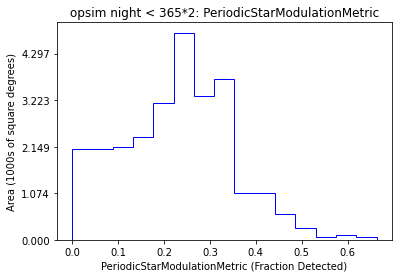

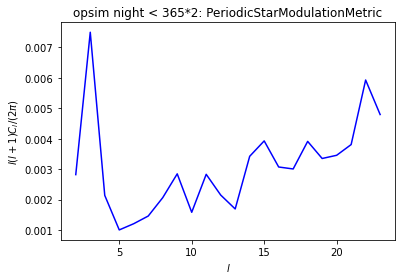

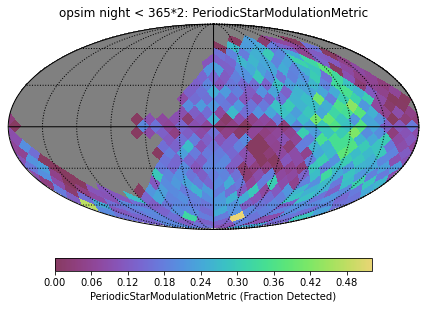

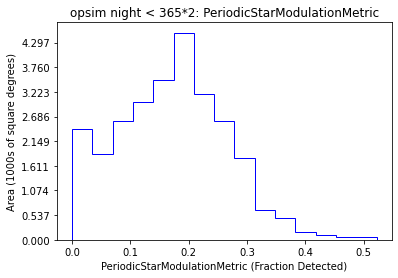

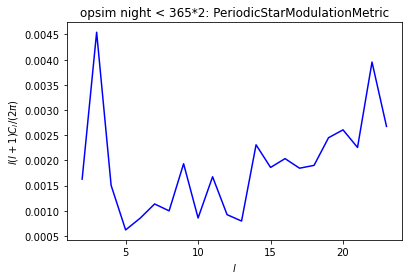

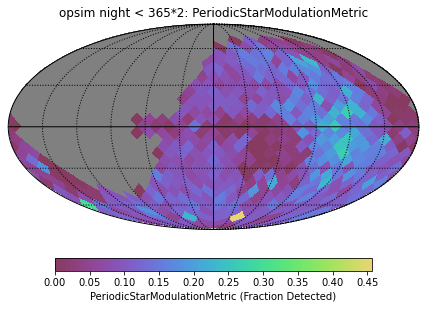

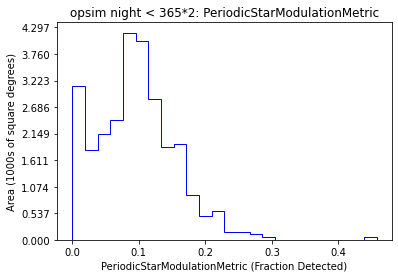

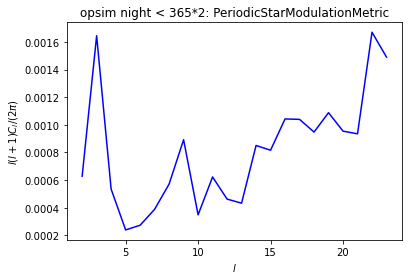

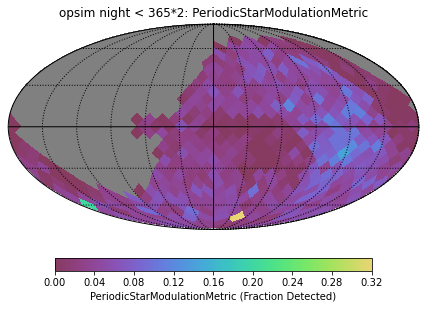

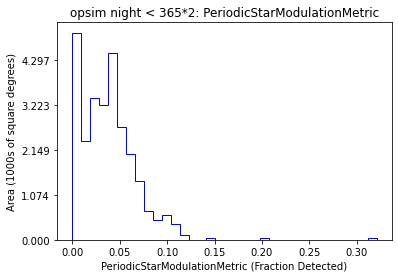

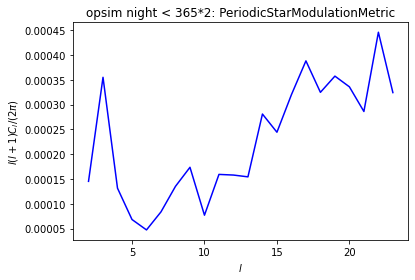

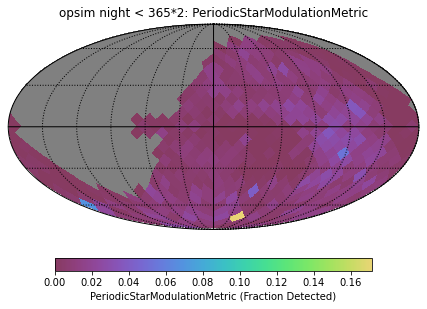

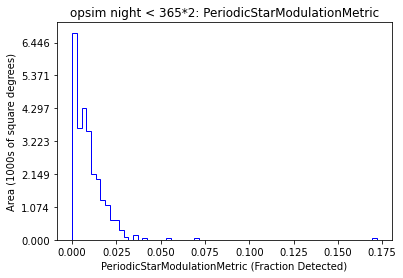

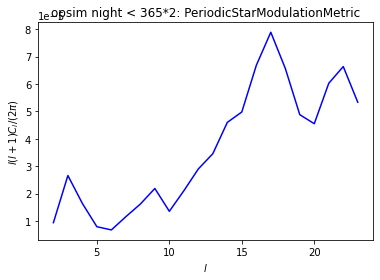

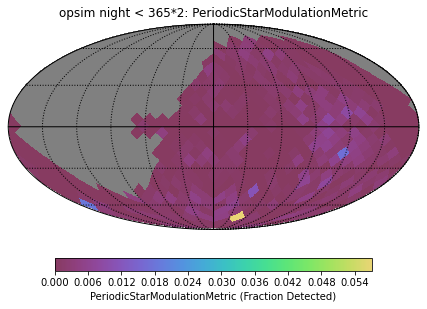

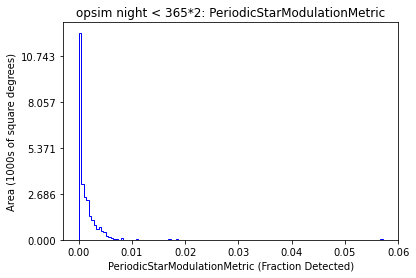

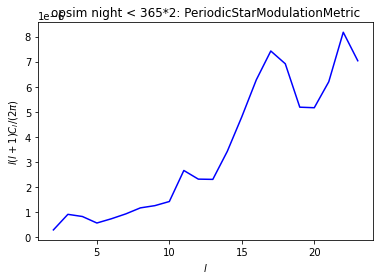

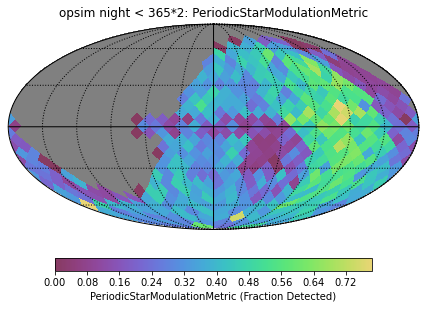

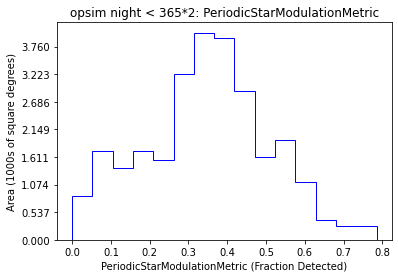

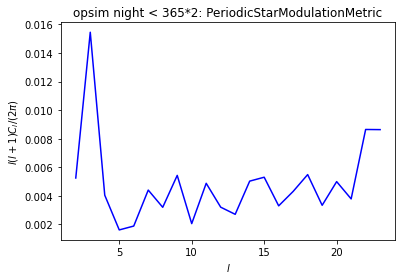

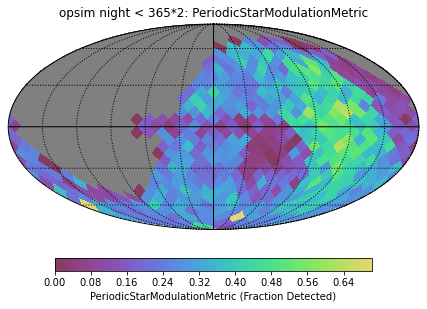

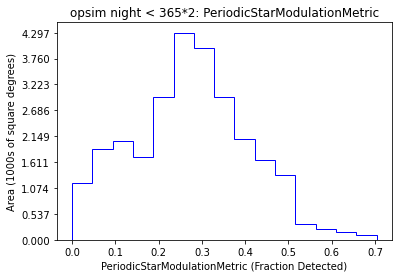

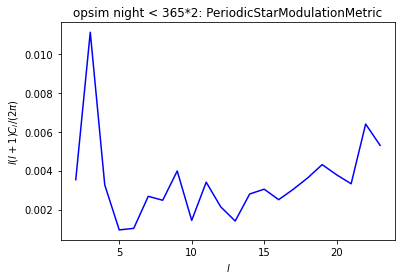

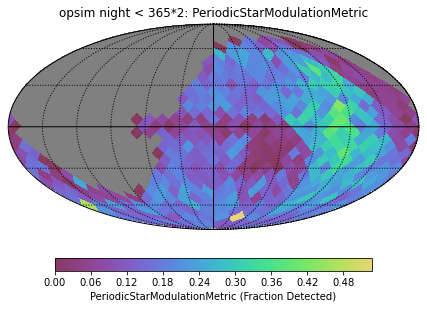

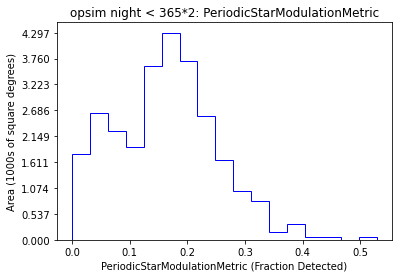

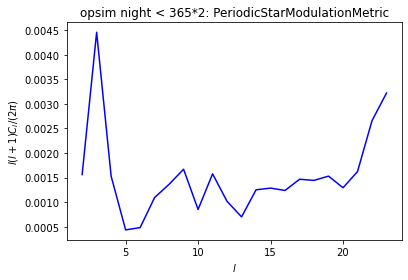

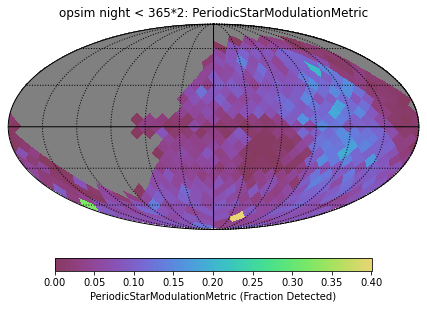

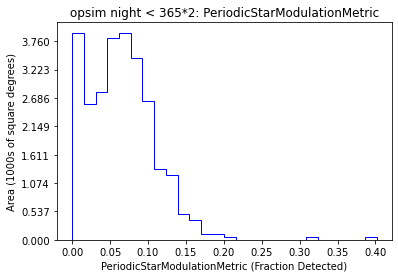

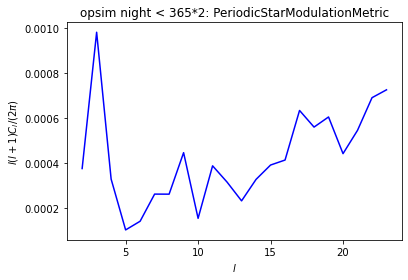

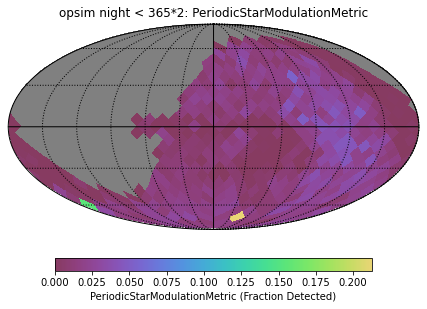

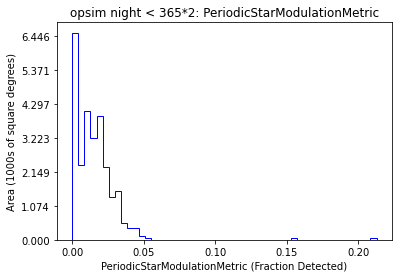

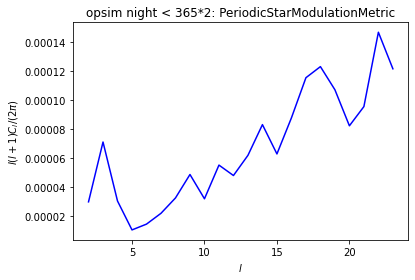

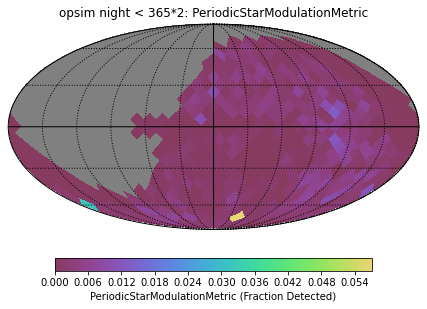

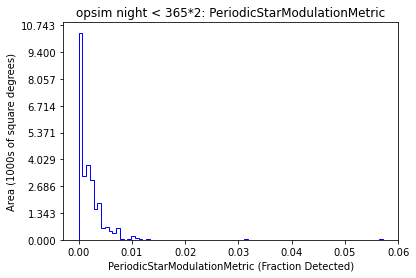

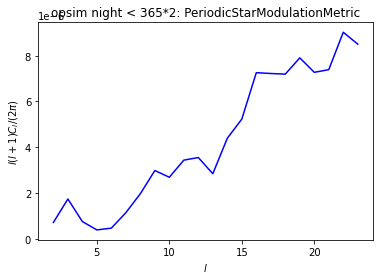

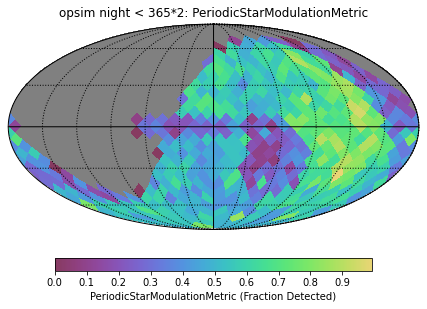

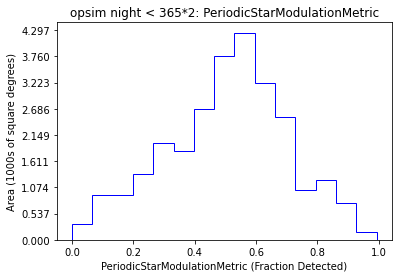

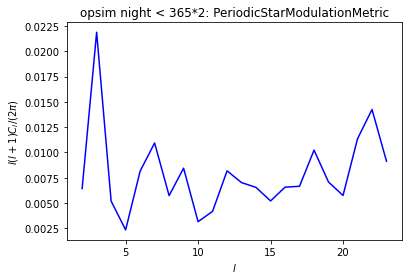

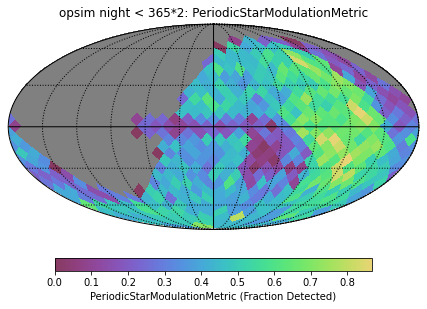

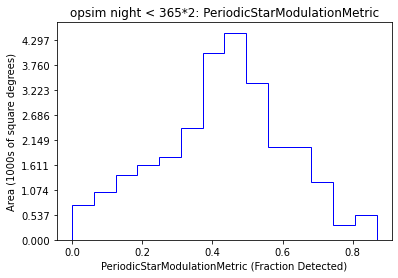

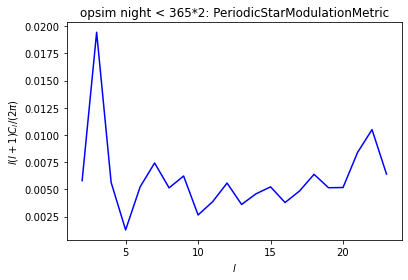

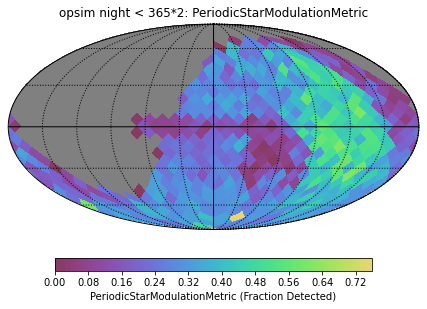

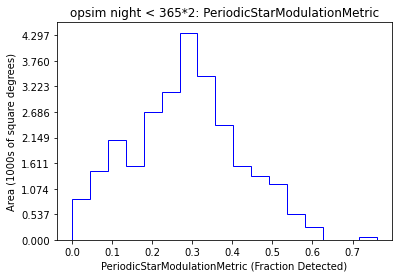

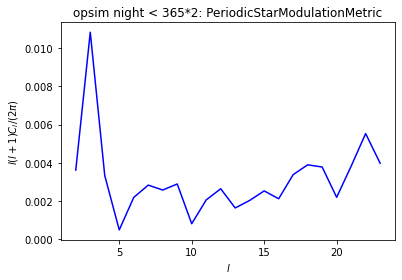

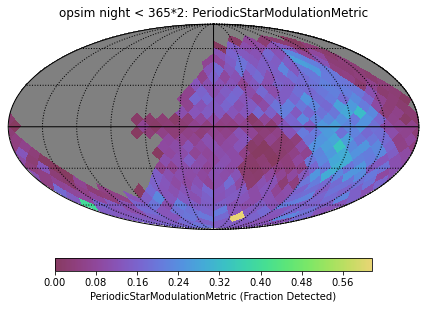

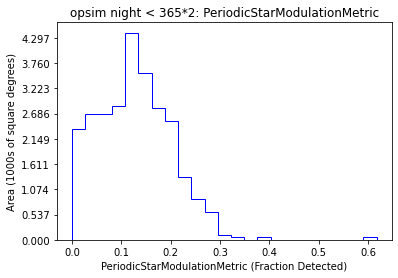

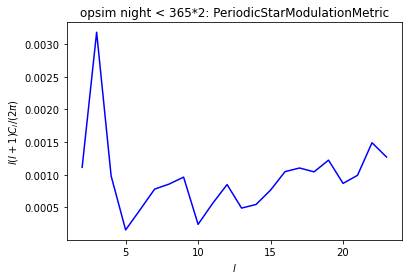

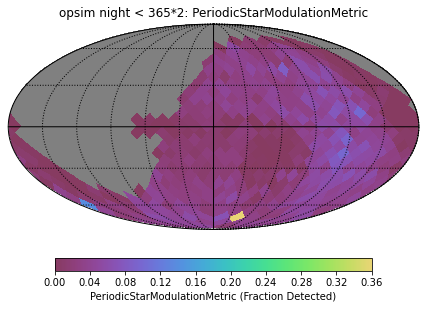

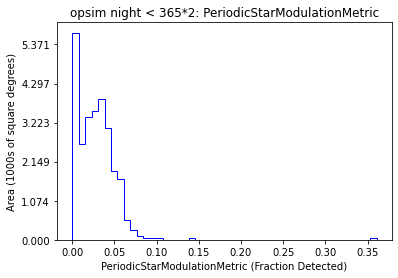

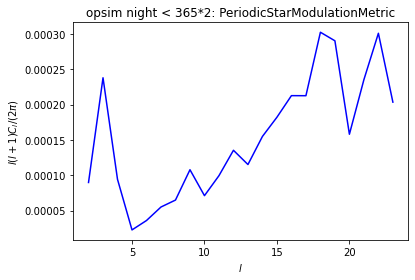

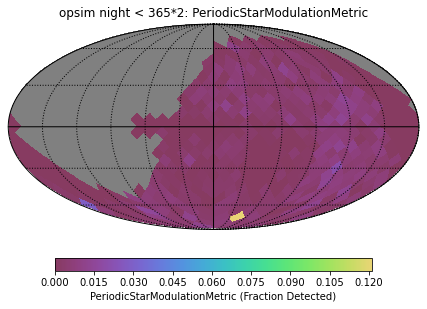

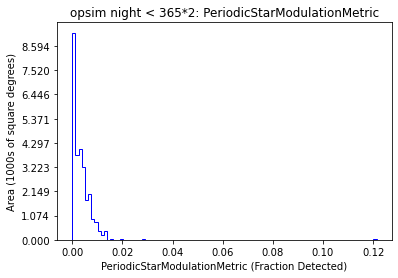

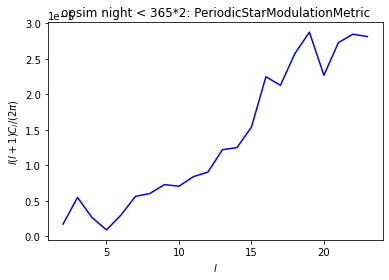

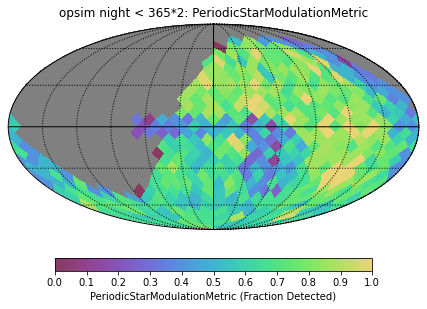

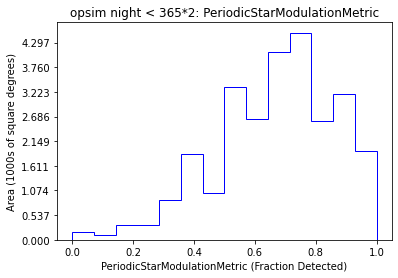

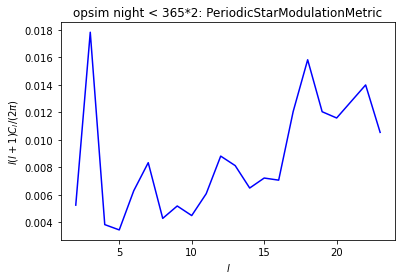

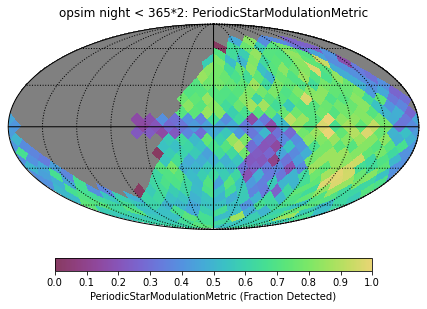

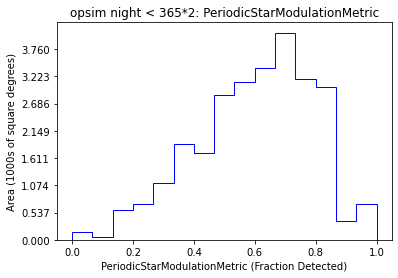

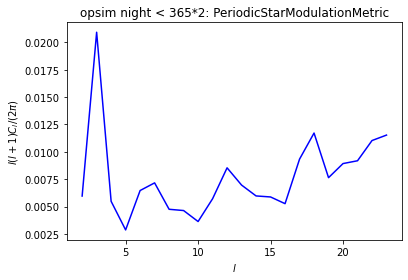

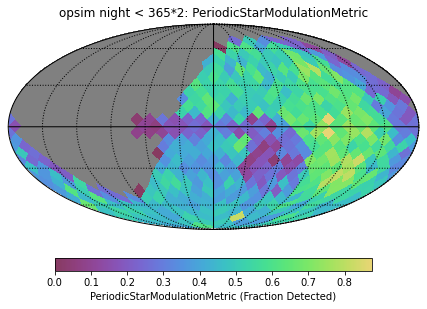

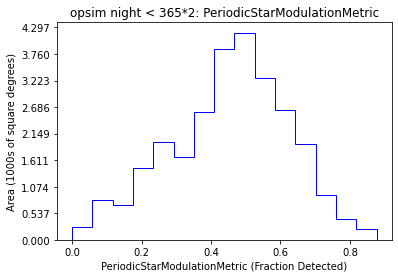

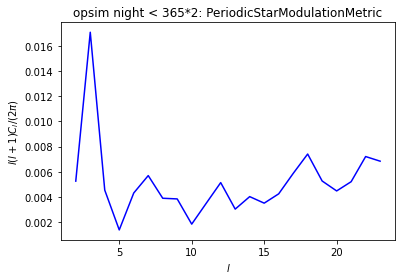

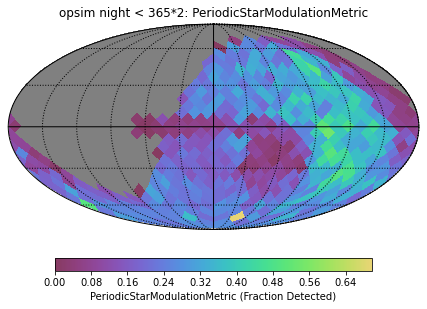

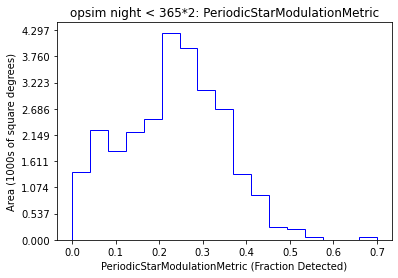

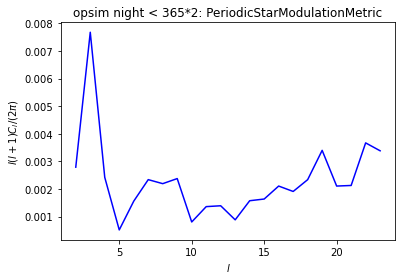

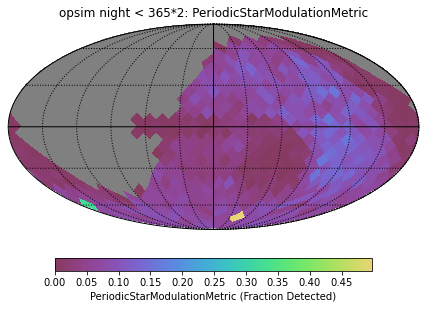

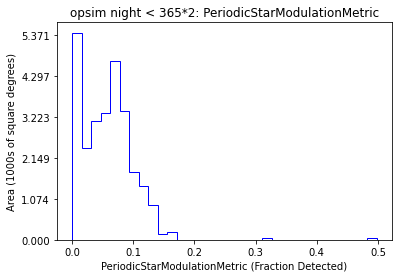

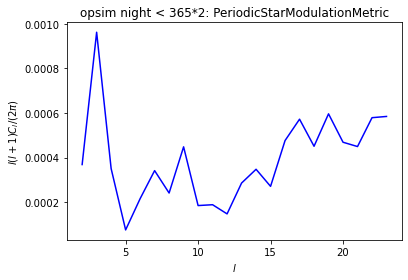

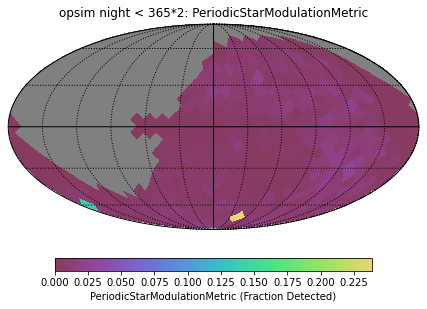

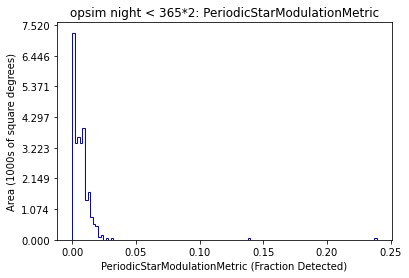

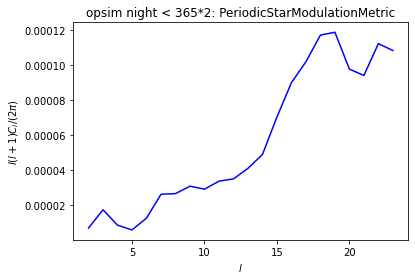

In [5]:
#Recovery of RRa



I_RRab_lmc = 18.9
V_RRab_lmc = 19.4

Vi = V_RRab_lmc - (2.742 * 0.08) - 18.5   
Ii = I_RRab_lmc - (1.505 * 0.08) - 18.5

ii_rrab = Ii + 0.386*0.013 + 0.397  # 0.013 = (i-z)_0
gi_rrab = Ii+ 1.481*(Vi-Ii) - 0.536
ri_rrab = (1/0.565) * (Vi-0.435*gi_rrab + 0.016)
ui_rrab = ri_rrab + 0.575
zi_rrab = Ii - 0.013
yi_rrab = zi_rrab



time_intervals = (15,20,30,50) #the interval in days over which we want to evaluate the light curve
distMod = (17.0,18.0,19.0,20.0,21.0,22.0) 

for k in range(0,len(time_intervals)):
    
    time_interval = time_intervals[k]

    for j in range(0,len(distMod)):

        dm = distMod[j]

        metric = PeriodicStarModulationMetric(period=0.3, amplitude=0.3,random_phase=True,
                                      time_interval=time_interval,
                                nMonte=100, periodTol=0.002, ampTol=0.01, means=[ui_rrab+dm,gi_rrab+dm,ri_rrab+dm,ii_rrab+dm,zi_rrab+dm,yi_rrab+dm],
                                magTol=0.01, nBands=3)        
    
        #slicer = slicers.HealpixSlicer(nside=8)
    
        slicer = slicers.HealpixSlicer(nside=8,latCol='galb', lonCol='gall', latLonDeg=False)

        sql = 'night < 365*2'
        
        #alternative SQL:  
        #year_start=0
        #year_finish=2
        #sql = 'night between %d and %d' % (365.25 * year_start, 365.25 * year_finish)

        bundle = metricBundles.MetricBundle(metric,slicer,sql)
        bg =  metricBundles.MetricBundleGroup({0:bundle}, opsdb,
                                          outDir=outDir, resultsDb=resultsDb)    
        bg.runAll()
        
        #bg.plotAll(closefigs=False, outfileSuffix = '%dmf.2_timeinterval%idays_repeat_RRab_gal'%(dm,time_interval))

        bg.plotAll(closefigs=False, outfileSuffix = '%dmf.2_timeinterval%idays_repeat_RRab_gal_rolling'%(dm,time_interval))

        #bg.plotAll(closefigs=False, outfileSuffix = '%dmf.2_timeinterval%idays_repeat_RRab_gal_pair_times'%(dm,time_interval))

